In [2]:
!pip install wordcloud arabica statsmodels awswrangler

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/22/0d/bb4eccd60d272b33cbc79c661c60acc604f1688cfc922deb9d3eb5be640a/wordcloud-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for arabica from https://files.pythonhosted.org/packages/fc/56/a81dda7f5c975eb978486e08cf1542dbc44194d33756be61934aa364187b/arabica-1.7.6-py3-none-any.whl.metadata
  Using cached arabica-1.7.6-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for awswrangler from https://files.pythonhosted.org/packages/59/36/8fac34745e7b5847ec1ba6acce062e2966419ace0b41ae1bc9ebbbb89e1a/awswrangler-3.4.2-py3-none-any.whl.metadata
  Using cached awswrangler-3.4.2-py3-none-any.whl.metadata (23 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 29.1 MB/s eta 0:00:0000:0100:01
  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.5/770.5 kB 7.3 MB/s eta 0:0

In [2]:
import pandas as pd
import numpy as np
import os as os
import statsmodels
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.util import ngrams
#from arabica import arabica_freq
import unidecode
import re
import warnings
import awswrangler as wr
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
def query(query, username):
    """Retorna df da consulta ao banco de dados"""
    
    from datetime import datetime
    dt = datetime.today().strftime('%Y-%m-%d-%H-%M-%S-%f')
    path = f"s3://will-sdx-ml-platform-sagemaker-transient/{username}/{dt}"

    df = wr.athena.read_sql_query(query, 
    database=None, 
    ctas_approach=False, 
    s3_output=path)

    return df 

#boto3_session = boto3.Session(region_name='sa-east-1')

In [5]:
query_string = """

select * from 
cx_curated_zone.indecx_nps
where lower(ds_categorias) like '%app%'

"""

In [6]:
nps = query(query_string, 'flavia-costa')
nps

,nm_social_cliente,cpf,nm_email_cliente,id_cliente,ds_aplicativo,ds_acao,dt_resposta,nr_nota_nps,ds_lealdade_nps,ds_genero,...,is_contato_60d,is_contato_60d_chat,is_contato_60d_email,is_contato_60d_ra,nr_nota_cliente_60d_ra,is_processo_juridico,is_anonimo,vl_fatura_media_3meses,ds_faixa_spending_credito,dt_ult_compra
0,ANONIMO,<NA>,<NA>,<NA>,will,onboarding,2022-02-20 11:51:45,10,promotor,<NA>,...,0,0,0,0,NaN,0,1,NaN,<NA>,<NA>
1,ANONIMO,<NA>,<NA>,<NA>,will,onboarding,2022-02-22 17:47:08,10,promotor,<NA>,...,0,0,0,0,NaN,0,1,NaN,<NA>,<NA>
2,ANONIMO,<NA>,<NA>,<NA>,will,onboarding,2022-02-23 13:24:39,10,promotor,<NA>,...,0,0,0,0,NaN,0,1,NaN,<NA>,<NA>
3,ANONIMO,<NA>,<NA>,<NA>,will,onboarding,2023-03-21 21:49:25,10,promotor,<NA>,...,0,0,0,0,NaN,0,1,NaN,<NA>,<NA>
4,ANONIMO,<NA>,<NA>,<NA>,will,onboarding,2022-02-02 17:42:13,10,promotor,<NA>,...,0,0,0,0,NaN,0,1,NaN,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37119,ANONIMO,<NA>,<NA>,<NA>,will,onboarding,2022-02-01 09:49:38,10,promotor,<NA>,...,0,0,0,0,NaN,0,1,NaN,<NA>,<NA>
37120,CRISLEY KAOANA DA SILVA ALVES,05946695371,crikaalves98@gmail.com,90060fda-5987-43e0-980c-88e0e8388d59,will,onboarding,2023-07-24 21:17:02,10,promotor,F,...,0,0,0,0,NaN,0,0,NaN,<NA>,<NA>
37121,FRANCISCA LUCIVANDA MATIAS GONÇALVES,70634491334,lucivandamatias185@gmail.com,bf232d7d-f598-442f-8651-e1a4ec93327c,will,onboarding,2023-02-13 18:17:01,10,promotor,F,...,0,0,0,0,NaN,0,0,NaN,Baixo - ate R$500,<NA>
37122,VILNICE PEREIRA GOMES,11100367608,miksam476@gmail.com,51062090,pag,clientes ativos,2022-12-28 07:29:14,9,promotor,F,...,1,0,1,0,NaN,0,0,NaN,<NA>,<NA>


In [7]:
len(nps)

37124

In [8]:
nps.columns

Index(['nm_social_cliente', 'cpf', 'nm_email_cliente', 'id_cliente',
       'ds_aplicativo', 'ds_acao', 'dt_resposta', 'nr_nota_nps',
       'ds_lealdade_nps', 'ds_genero', 'ds_faixa_etaria', 'uf', 'ds_regiao',
       'dt_abertura_conta', 'vl_limite_cartao', 'ds_faixa_limite_cartao',
       'ds_tipo_de_conta', 'ds_facil_procurar_no_app',
       'nr_onboarding_cadastro', 'nr_onboarding_aprovacao',
       'nr_onboarding_limite', 'nr_onboarding_login',
       'nr_ativo_recebimento_cartao', 'ds_ativo_desbloqueio_cartao',
       'nr_ativo_limite', 'ds_ativo_confianca_cartao', 'nr_ativo_fatura',
       'nr_ativo_espera_chat', 'nr_inativo_limite',
       'ds_inativo_confianca_cartao', 'nr_inativo_fatura',
       'nr_inativo_espera_chat', 'ds_reacao_sentimento', 'nr_sentimento',
       'ds_categorias', 'ds_avaliacao', 'nr_score_ie', 'nr_score_ie_conta',
       'is_contato_60d', 'is_contato_60d_chat', 'is_contato_60d_email',
       'is_contato_60d_ra', 'nr_nota_cliente_60d_ra', 'is_processo_jur

In [9]:
nps['ds_lealdade_nps'].value_counts()

promotor    32203
detrator     2777
neutro       2144
Name: ds_lealdade_nps, dtype: Int64

In [10]:
nps.ds_facil_procurar_no_app.value_counts()

like       33976
dislike     3002
Name: ds_facil_procurar_no_app, dtype: Int64

In [20]:
stopwords_will= ['a', 'da', 'em', 'você', 'de', 'ao', 'os', 'que', 'e', 'eu', 'o', 'estou', 'ele','ela','pra', 'pro', 'entao', 'para', 'voce', 'com',
            'seu', 'sua', 'por', 'sobre', 'mais', 'uma', 'um', 'ta', 'to', 'ai', 'la', 'lo', 'lhe', 'ne','pra', 'tá', 'ne', 'ah', 'aí', "ai", 'dá', 'ó', 
            'mim', 'então', 'aqui', 'tô', 'pro', 'isso', "will", "bank", "willbank"]

In [12]:
nps.to_csv('base_nps_061223.csv', index = False)

## Detratores

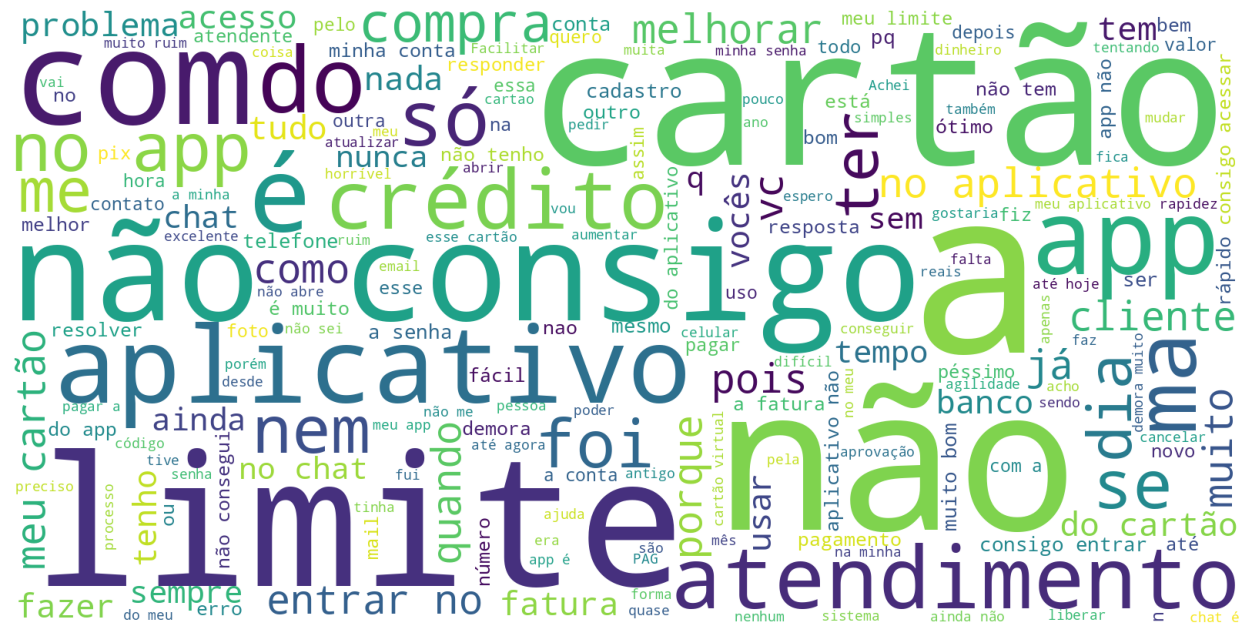

In [14]:
texto = nps.query('ds_lealdade_nps == "detrator"')['ds_avaliacao']
all_other = " ".join(s for s in texto)

wordcloud = WordCloud(stopwords=stopwords_will,
                      max_font_size = 300,
                      background_color='white'
                     , width=1600,                            
                      height=800
                     ).generate(all_other)

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

## Deram dislike na facilidade do app

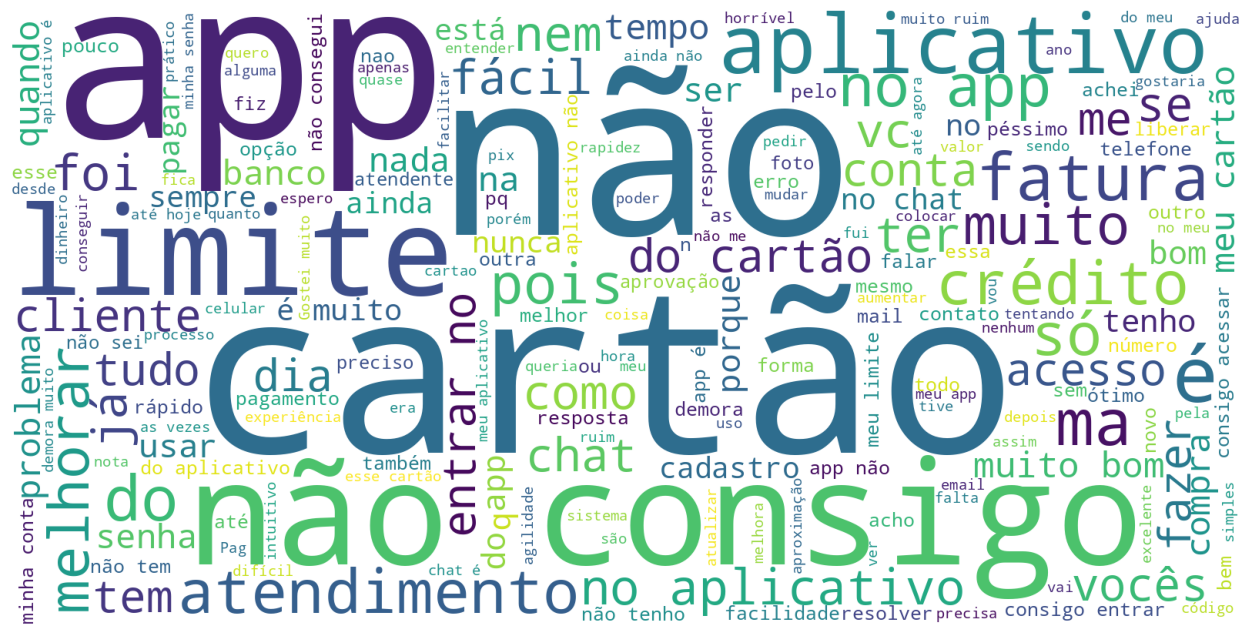

In [21]:
texto = nps.query('ds_facil_procurar_no_app == "dislike"')['ds_avaliacao']
all_other = " ".join(s for s in texto)
wordcloud = WordCloud(stopwords=stopwords_will,
                      max_font_size = 300,
                      background_color='white', width=1600,                            
                      height=800).generate(all_other)

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

## Função arabica

In [41]:
def ranking_cluster(df_clean, cluster, texto):
    
    df_agg_ungroup_final = pd.DataFrame([], columns=['unigram', 'unigram_freq',
                                                     'bigram','bigram_freq','trigram','trigram_freq', 'cluster'])
    
    for i in df_clean[cluster].unique():
        try:
            df_clean_tmp = df_clean[df_clean[cluster] == i ]
            df_agg_ungroup_tmp = arabica_freq(
                text = df_clean_tmp[texto],
                date_format = 'eur',
                time = df_clean_tmp['dt'],
                time_freq = 'ungroup',           # opção ungroup
                max_words = 10,             
                stopwords = ['portuguese'],   
                skip = [],      
                numbers = True,            
                #punct = True,              
                lower_case = True
            ) 
            
            result_temp = pd.DataFrame({'unigram': df_agg_ungroup_tmp['unigram'], 'unigram_freq': df_agg_ungroup_tmp['unigram_freq'],
                                        'bigram': df_agg_ungroup_tmp['bigram'], 'bigram_freq': df_agg_ungroup_tmp['bigram_freq'],
                                        'trigram': df_agg_ungroup_tmp['trigram'], 'trigram_freq': df_agg_ungroup_tmp['trigram_freq']}, index=[0])
            
            result_temp['cluster'] = i
                    
            df_agg_ungroup_final = df_agg_ungroup_final.append(result_temp)

        except (ValueError, IndexError) as error:
            pass
                
    return df_agg_ungroup_final

In [24]:
from arabica import arabica_freq

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


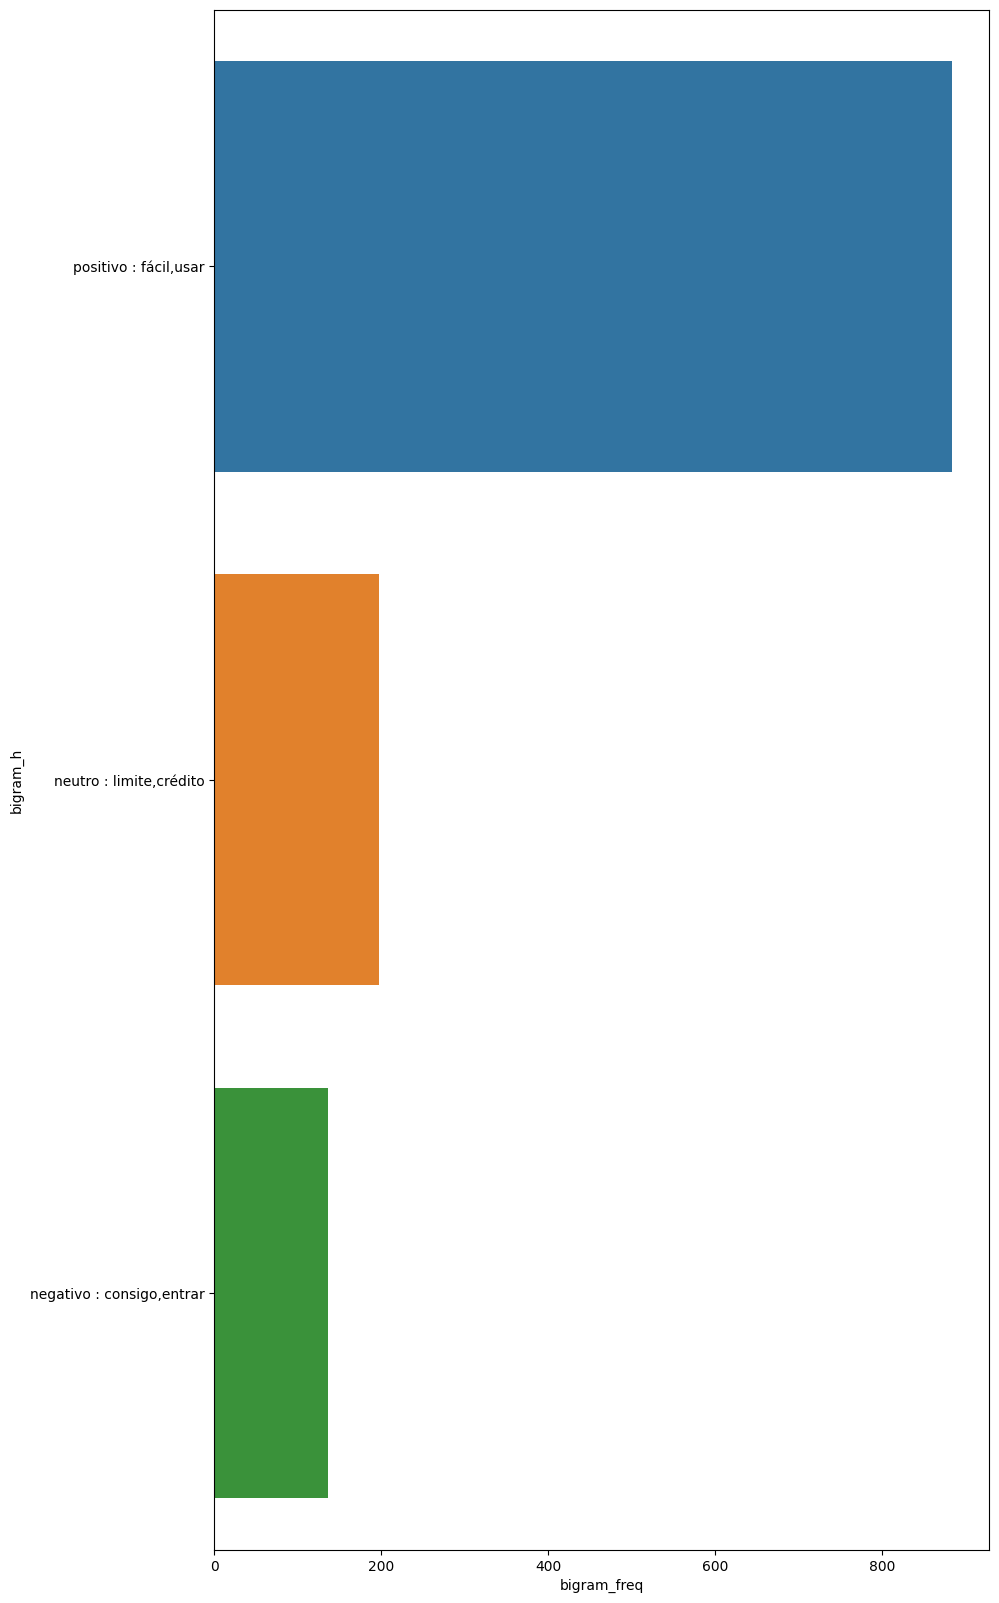

In [42]:
from datetime import datetime

nps['dt'] = datetime.today()
nps_resumo = ranking_cluster(nps, 'ds_reacao_sentimento', 'ds_avaliacao')
nps_resumo['unigram_freq'] = nps_resumo['unigram_freq'].astype('int')
nps_resumo['bigram_freq'] = nps_resumo['bigram_freq'].astype('int')
nps_resumo['trigram_freq'] = nps_resumo['trigram_freq'].astype('int')
nps_resumo['cluster'] = nps_resumo['cluster'].astype('str')

nps_resumo['unigram_h'] = nps_resumo['cluster'] + ' : ' + nps_resumo['unigram']
nps_resumo['bigram_h'] = nps_resumo['cluster'] + ' : ' + nps_resumo['bigram']
nps_resumo['trigram_h'] = nps_resumo['cluster'] + ' : ' + nps_resumo['trigram']

plt.figure(figsize=(10,20))
sns.barplot(data = nps_resumo.sort_values(by ='bigram_freq', ascending=False), x = 'bigram_freq', y = 'bigram_h')
plt.show()

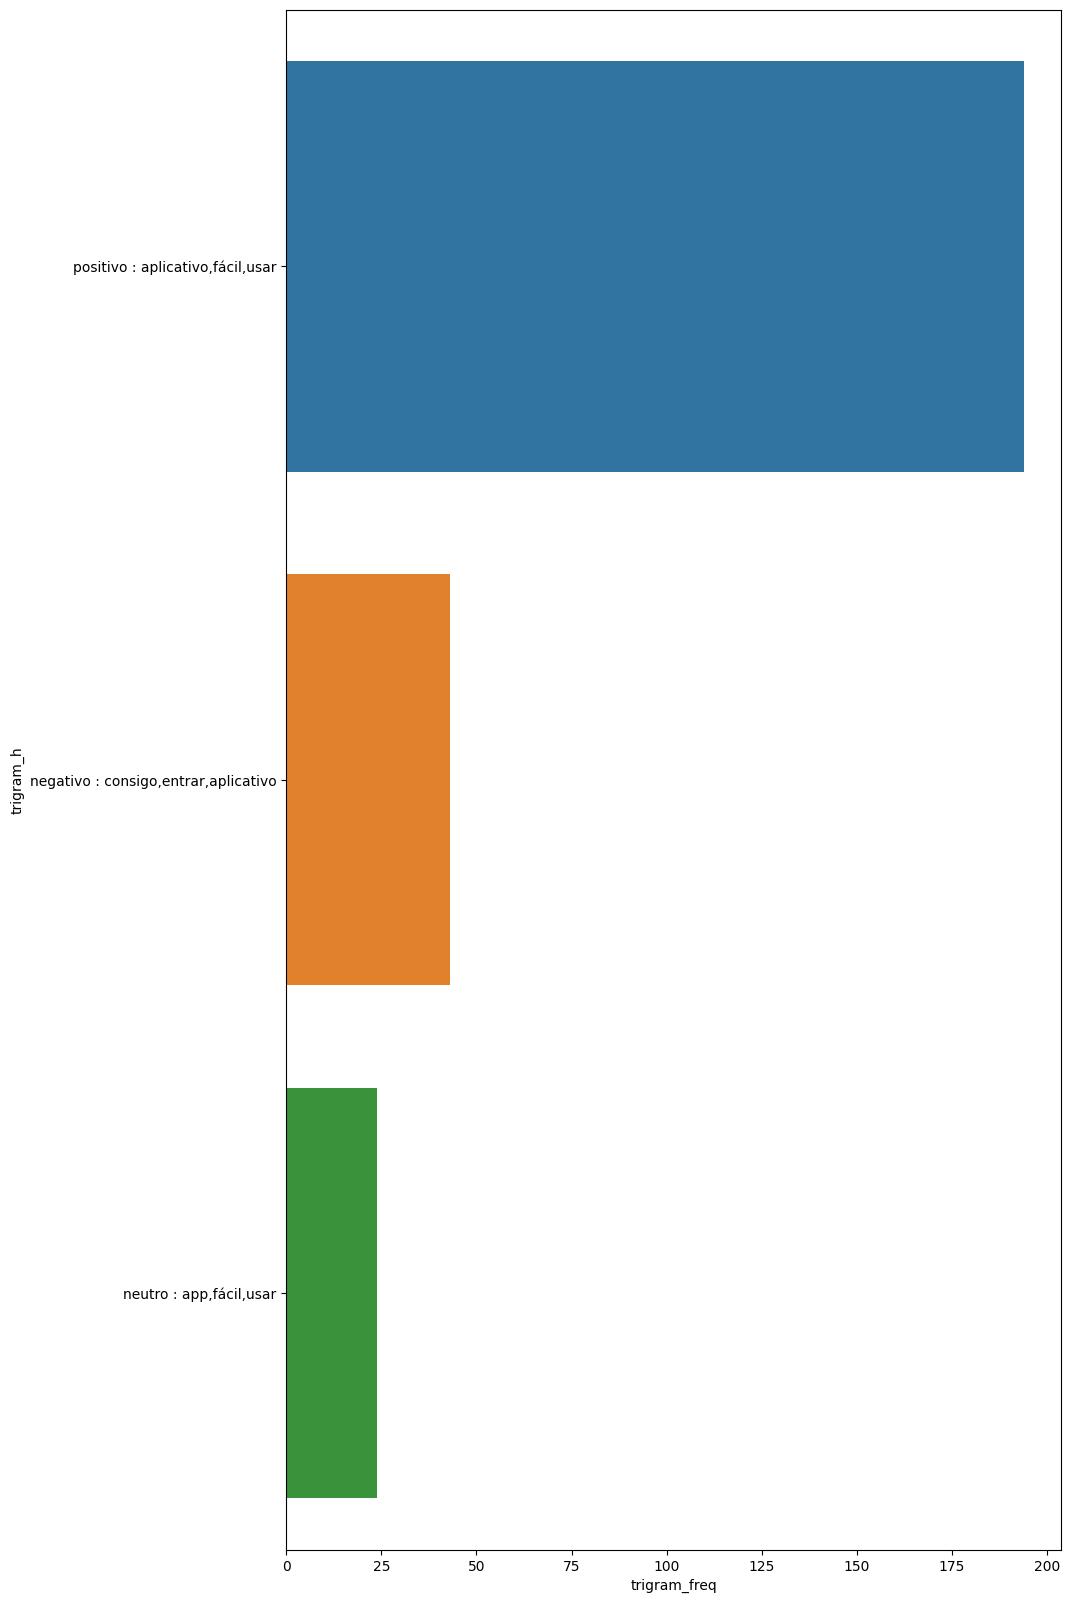

In [43]:
plt.figure(figsize=(10,20))
sns.barplot(data = nps_resumo.sort_values(by ='trigram_freq', ascending=False), x = 'trigram_freq', y = 'trigram_h')
plt.show()

## Por facilidade de procura no app

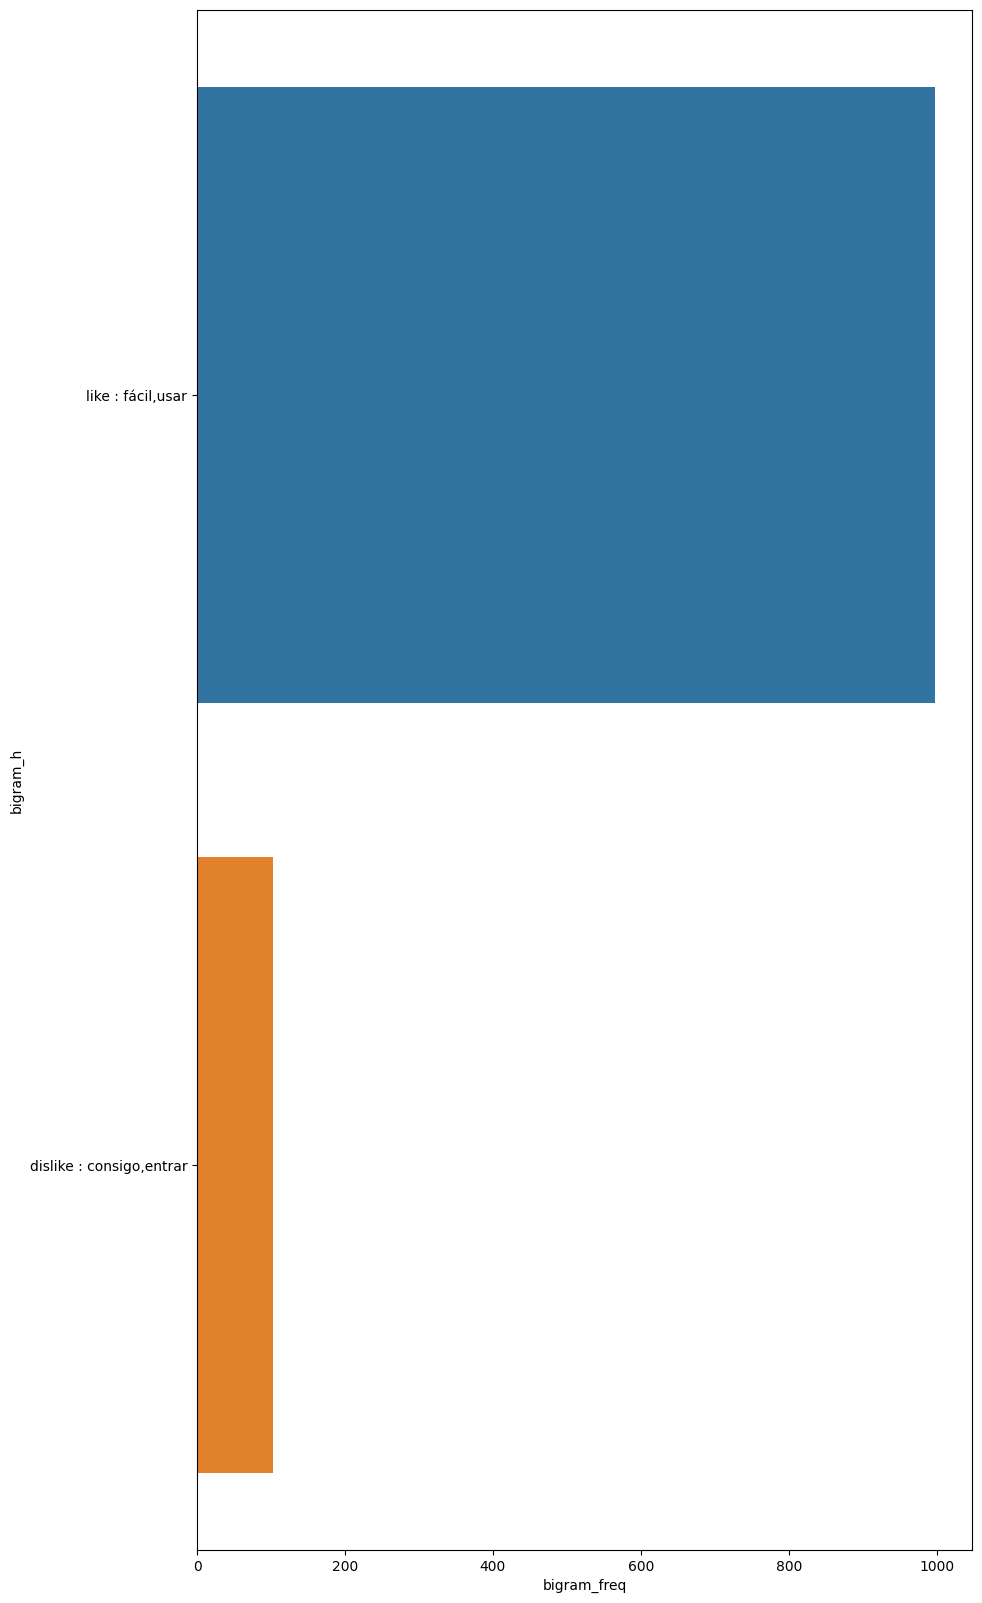

In [44]:
nps_resumo = ranking_cluster(nps, 'ds_facil_procurar_no_app', 'ds_avaliacao')
nps_resumo['unigram_freq'] = nps_resumo['unigram_freq'].astype('int')
nps_resumo['bigram_freq'] = nps_resumo['bigram_freq'].astype('int')
nps_resumo['trigram_freq'] = nps_resumo['trigram_freq'].astype('int')
nps_resumo['cluster'] = nps_resumo['cluster'].astype('str')

nps_resumo['unigram_h'] = nps_resumo['cluster'] + ' : ' + nps_resumo['unigram']
nps_resumo['bigram_h'] = nps_resumo['cluster'] + ' : ' + nps_resumo['bigram']
nps_resumo['trigram_h'] = nps_resumo['cluster'] + ' : ' + nps_resumo['trigram']

plt.figure(figsize=(10,20))
sns.barplot(data = nps_resumo.sort_values(by ='bigram_freq', ascending=False), x = 'bigram_freq', y = 'bigram_h')
plt.show()

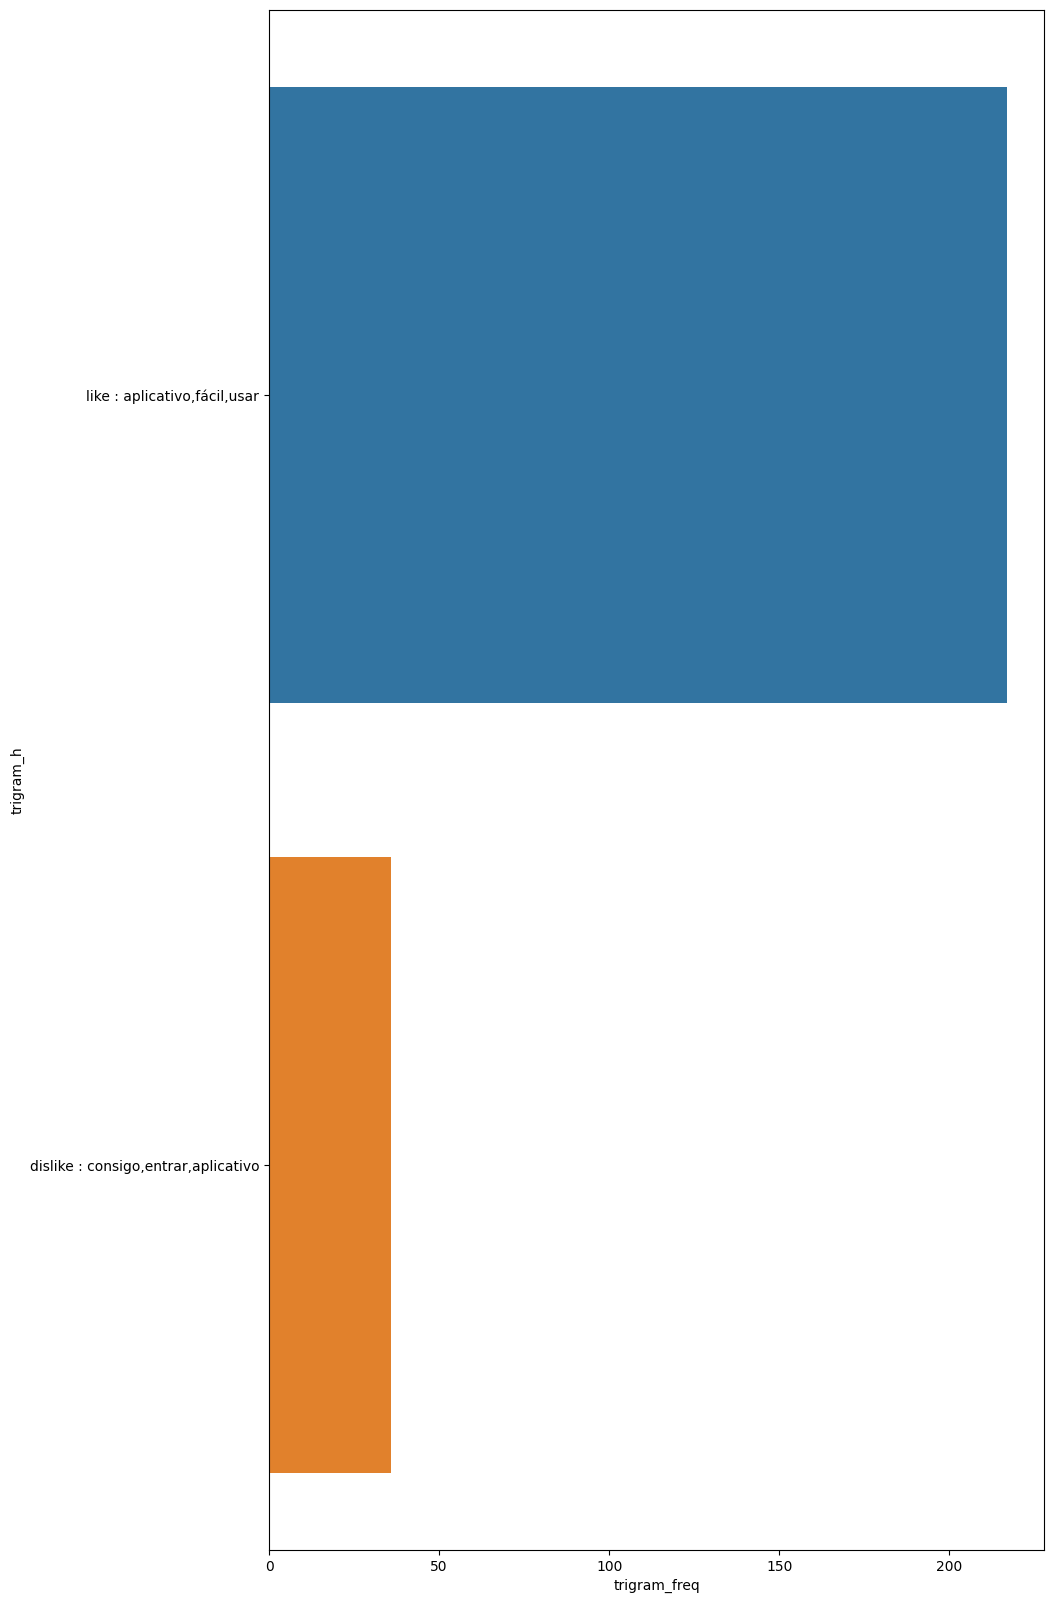

In [45]:
plt.figure(figsize=(10,20))
sns.barplot(data = nps_resumo.sort_values(by ='trigram_freq', ascending=False), x = 'trigram_freq', y = 'trigram_h')
plt.show()

In [46]:
df_clean_tmp = nps.query('ds_facil_procurar_no_app == "dislike"')

df_agg_ungroup_tmp = arabica_freq(
                text = df_clean_tmp['ds_avaliacao'],
                date_format = 'eur',
                time = df_clean_tmp['dt'],
                time_freq = 'ungroup',           # opção ungroup
                max_words = 10,             
                stopwords = ['portuguese'],   
                skip = [],      
                numbers = True,            
                #punct = True,              
                lower_case = True
            ) 

In [48]:
df_agg_ungroup_tmp.head(20)

,unigram,unigram_freq,bigram,bigram_freq,trigram,trigram_freq
0,app,897,"consigo,entrar",103,"consigo,entrar,aplicativo",36
1,aplicativo,810,"consigo,acessar",94,"consigo,entrar,app",31
2,cartão,786,"entrar,aplicativo",72,"consigo,acessar,aplicativo",26
3,limite,467,"entrar,app",60,"consigo,acessar,app",25
4,consigo,455,"acessar,app",58,"consigo,acessar,conta",22
5,pra,381,"acessar,aplicativo",50,"atendimento,via,chat",15
6,chat,340,"limite,crédito",46,"consigo,entrar,conta",13
7,atendimento,278,"cartão,crédito",44,"segunda,via,cartão",12
8,bom,270,"will,bank",40,"ter,acesso,aplicativo",11
9,fatura,263,"acesso,aplicativo",39,"consigo,ter,acesso",9


In [51]:
df_clean_tmp = nps.query('ds_lealdade_nps == "detrator"')

df_agg_ungroup_tmp = arabica_freq(
                text = df_clean_tmp['ds_avaliacao'],
                date_format = 'eur',
                time = df_clean_tmp['dt'],
                time_freq = 'ungroup',           # opção ungroup
                max_words = 10,             
                stopwords = ['portuguese'],   
                skip = [],      
                numbers = True,            
                #punct = True,              
                lower_case = True
            ) 

In [52]:
df_agg_ungroup_tmp.head(20)

,unigram,unigram_freq,bigram,bigram_freq,trigram,trigram_freq
0,cartão,809,"consigo,entrar",107,"consigo,entrar,app",35
1,app,753,"consigo,acessar",92,"consigo,entrar,aplicativo",34
2,aplicativo,699,"entrar,aplicativo",70,"consigo,acessar,aplicativo",26
3,limite,476,"entrar,app",67,"consigo,acessar,app",23
4,consigo,443,"acessar,app",57,"consigo,acessar,conta",22
5,pra,370,"cartão,crédito",57,"atendimento,via,chat",16
6,chat,311,"acessar,aplicativo",51,"consigo,entrar,conta",14
7,atendimento,287,"limite,crédito",44,"segunda,via,cartão",12
8,entrar,266,"pagar,fatura",42,"consegui,acessar,app",10
9,conta,251,"acesso,aplicativo",38,"melhorar,atendimento,chat",10


In [49]:
df_clean_tmp = nps.query('ds_reacao_sentimento == "negativo"')

df_agg_ungroup_tmp = arabica_freq(
                text = df_clean_tmp['ds_avaliacao'],
                date_format = 'eur',
                time = df_clean_tmp['dt'],
                time_freq = 'ungroup',           # opção ungroup
                max_words = 10,             
                stopwords = ['portuguese'],   
                skip = [],      
                numbers = True,            
                #punct = True,              
                lower_case = True
            ) 

In [50]:
df_agg_ungroup_tmp.head(20)

,unigram,unigram_freq,bigram,bigram_freq,trigram,trigram_freq
0,cartão,1180,"consigo,entrar",136,"consigo,entrar,aplicativo",43
1,app,1128,"consigo,acessar",109,"consigo,entrar,app",42
2,aplicativo,1099,"entrar,aplicativo",105,"consigo,acessar,aplicativo",29
3,limite,769,"entrar,app",97,"consigo,acessar,app",28
4,pra,595,"limite,crédito",87,"consigo,acessar,conta",25
5,consigo,591,"cartão,crédito",85,"atendimento,via,chat",22
6,chat,471,"acessar,app",76,"consigo,entrar,conta",17
7,atendimento,394,"acessar,aplicativo",64,"conseguindo,entrar,aplicativo",16
8,fatura,382,"pagar,fatura",63,"segunda,via,cartão",16
9,entrar,380,"demora,pra",52,"conseguindo,entrar,app",15


In [57]:
nps['flag_nao_consigo'] = nps['ds_avaliacao'].str.contains("não consigo")
nps['flag_nao_consigo'].value_counts()

False    36791
True       326
Name: flag_nao_consigo, dtype: Int64

In [64]:
df_clean_tmp = nps[nps['flag_nao_consigo'] == True]

df_agg_ungroup_tmp = arabica_freq(
                text = df_clean_tmp['ds_avaliacao'],
                date_format = 'eur',
                time = df_clean_tmp['dt'],
                time_freq = 'ungroup',           # opção ungroup
                max_words = 10,             
                stopwords = ['portuguese'],   
                skip = ['não', 'consigo', 'entrar', 'app', 'aplicativo'],      
                numbers = True,            
                #punct = True,              
                lower_case = True
            ) 

In [66]:
df_agg_ungroup_tmp.head(20)

,unigram,unigram_freq,bigram,bigram_freq,trigram,trigram_freq
0,cartão,146,"acessar,conta",14,"fazer,nova,senha",3
1,acessar,71,"pagar,fatura",12,"sei,quanto,limite",3
2,senha,70,"ter,acesso",12,"segunda,via,cartão",3
3,conta,64,"usar,cartão",11,"desde,aprovado,cartão",2
4,limite,56,"número,telefone",11,"cartão,vou,desinstalar",2
5,pra,52,"fazer,pix",9,"pagar,fatura,cartão",2
6,fazer,48,"faz,tempo",8,"contato,faz,tempo",2
7,acesso,46,"recuperar,senha",8,"quero,mudar,número",2
8,fatura,42,"aumentar,limite",8,"tentando,mudar,senha",2
9,nada,39,"cartão,crédito",8,"cliente,faz,tempo",2


In [3]:
nps_dez = pd.read_csv('base_nps_061223.csv')

In [5]:
nps_dez.columns

Index(['nm_social_cliente', 'cpf', 'nm_email_cliente', 'id_cliente',
       'ds_aplicativo', 'ds_acao', 'dt_resposta', 'nr_nota_nps',
       'ds_lealdade_nps', 'ds_genero', 'ds_faixa_etaria', 'uf', 'ds_regiao',
       'dt_abertura_conta', 'vl_limite_cartao', 'ds_faixa_limite_cartao',
       'ds_tipo_de_conta', 'ds_facil_procurar_no_app',
       'nr_onboarding_cadastro', 'nr_onboarding_aprovacao',
       'nr_onboarding_limite', 'nr_onboarding_login',
       'nr_ativo_recebimento_cartao', 'ds_ativo_desbloqueio_cartao',
       'nr_ativo_limite', 'ds_ativo_confianca_cartao', 'nr_ativo_fatura',
       'nr_ativo_espera_chat', 'nr_inativo_limite',
       'ds_inativo_confianca_cartao', 'nr_inativo_fatura',
       'nr_inativo_espera_chat', 'ds_reacao_sentimento', 'nr_sentimento',
       'ds_categorias', 'ds_avaliacao', 'nr_score_ie', 'nr_score_ie_conta',
       'is_contato_60d', 'is_contato_60d_chat', 'is_contato_60d_email',
       'is_contato_60d_ra', 'nr_nota_cliente_60d_ra', 'is_processo_jur

In [6]:
nps_dez.dtypes

nm_social_cliente               object
cpf                            float64
nm_email_cliente                object
id_cliente                      object
ds_aplicativo                   object
ds_acao                         object
dt_resposta                     object
nr_nota_nps                      int64
ds_lealdade_nps                 object
ds_genero                       object
ds_faixa_etaria                 object
uf                              object
ds_regiao                       object
dt_abertura_conta               object
vl_limite_cartao               float64
ds_faixa_limite_cartao          object
ds_tipo_de_conta                object
ds_facil_procurar_no_app        object
nr_onboarding_cadastro         float64
nr_onboarding_aprovacao        float64
nr_onboarding_limite           float64
nr_onboarding_login            float64
nr_ativo_recebimento_cartao    float64
ds_ativo_desbloqueio_cartao     object
nr_ativo_limite                float64
ds_ativo_confianca_cartao

In [12]:
from arabica import arabica_freq

In [25]:
df_agg_ungroup_tmp = arabica_freq(
                text = nps_dez['ds_avaliacao'],
                time = nps_dez['dt_resposta'],
                time_freq = 'M',           # opção ungroup
                max_words = 4,             
                stopwords = ['portuguese'],
                #stopwords = [],
                skip = ['limite','crédito' , 'cartão'],      
                numbers = True,            
                punct = True,              
                lower_case = True
            ) 

In [ ]:
df_agg_ungroup_tmp

,period,unigram,bigram,trigram
0,2022-01,"bom: 214,app: 145,aplicativo: 145,atendimento:...","aplicativo,fácil: 18,app,fácil: 16,tempo,esper...","tempo,espera,aprovação: 4,aplicativo,fácil,usa..."
1,2022-02,"bom: 162,aplicativo: 143,atendimento: 111,app:...","aplicativo,fácil: 18,aplicativo,bom: 18,will,b...","facilidade,usar,aplicativo: 4,aplicativo,fácil..."
2,2022-03,"bom: 234,aplicativo: 156,app: 156,fácil: 139","aplicativo,fácil: 22,fácil,usar: 20,ótimo,aten...","aplicativo,fácil,usar: 6,feliz,fazer,parte: 6,..."
3,2022-04,"bom: 241,app: 180,aplicativo: 175,fácil: 147","fácil,usar: 23,aplicativo,fácil: 18,app,fácil:...","aplicativo,super,fácil: 6,app,fácil,usar: 6,fa..."
4,2022-05,"bom: 218,app: 174,aplicativo: 173,fácil: 135","aplicativo,fácil: 19,fácil,usar: 16,ótimo,aten...","facilidade,usar,app: 5,aplicativo,super,fácil:..."
5,2022-06,"bom: 191,app: 147,aplicativo: 132,fácil: 111","fácil,usar: 16,aplicativo,fácil: 15,app,fácil:...","app,fácil,usar: 4,tempo,espera,chat: 3,atendim..."
6,2022-07,"bom: 231,aplicativo: 182,app: 163,fácil: 160","fácil,usar: 21,bom,atendimento: 21,aplicativo,...","bem,fácil,usar: 4,app,fácil,usar: 4,r$,.,;: 3,..."
7,2022-08,"bom: 215,app: 152,aplicativo: 147,atendimento:...","will,bank: 21,app,fácil: 19,aplicativo,fácil: ...","!,!,!: 8,$,$,!: 5,$,!,$: 4,aplicativo,fácil,me..."
8,2022-09,"bom: 224,aplicativo: 147,fácil: 140,app: 128","app,fácil: 19,aplicativo,fácil: 17,ótimo,atend...","consigo,acessar,aplicativo: 4,tempo,aprovação,..."
9,2022-10,"bom: 179,fácil: 130,ótimo: 87,atendimento: 80","fácil,usar: 22,bom,atendimento: 19,app,fácil: ...","bom,fácil,usar: 3,fazer,parte,desse: 3,super,f..."
